In [ ]:
import pandas as pd

ratings = pd.read_csv("rating.csv")
movies = pd.read_csv("movie.csv")

print("Prime righe di rating.csv:")
print(ratings.head())

print("\nPrime righe di movie.csv:")
print(movies.head())

print("\nInformazioni sul dataset rating.csv:")
print(ratings.info())

print("\nInformazioni sul dataset movie.csv:")
print(movies.info())

Prime righe di rating.csv:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Prime righe di movie.csv:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Informazioni sul dataset rating.csv:
<class 'pandas.core.frame

In [ ]:
print("\nValori nulli in rating.csv:")
print(ratings.isnull().sum())

print("\nValori nulli in movie.csv:")
print(movies.isnull().sum())

print("\nDuplicati in rating.csv:", ratings.duplicated().sum())
print("Duplicati in movie.csv:", movies.duplicated().sum())


Valori nulli in rating.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Valori nulli in movie.csv:
movieId    0
title      0
genres     0
dtype: int64

Duplicati in rating.csv: 0
Duplicati in movie.csv: 0


In [ ]:
ratings_with_movies = pd.merge(ratings, movies, on='movieId', how='inner')

print("\nPrime righe del dataset unito:")
print(ratings_with_movies.head())

print("\nDimensioni del dataset unito:", ratings_with_movies.shape)


Prime righe del dataset unito:
   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  

Dimensioni del dataset unito: (20000263, 6)


In [ ]:
movies_per_user = ratings_with_movies.groupby('userId')['movieId'].count()
print("\nNumero medio di film visti per utente:", movies_per_user.mean())

ratings_per_movie = ratings_with_movies.groupby('movieId')['userId'].count()
print("Numero medio di rating ricevuti per film:", ratings_per_movie.mean())

genres_exploded = ratings_with_movies['genres'].str.split('|').explode()
print("\nGeneri più popolari:")
print(genres_exploded.value_counts().head(10))


Numero medio di film visti per utente: 144.4135299257002
Numero medio di rating ricevuti per film: 747.8411232425965

Generi più popolari:
genres
Drama        8857853
Comedy       7502234
Action       5614208
Thriller     5313506
Adventure    4380351
Romance      3802002
Crime        3298335
Sci-Fi       3150141
Fantasy      2111403
Children     1669249
Name: count, dtype: int64


In [5]:
correlation = ratings_per_movie.corr(ratings_with_movies.groupby('movieId')['rating'].mean())
print("Correlazione tra popolarità e rating medio:", correlation)

Correlazione tra popolarità e rating medio: 0.14317987561648113


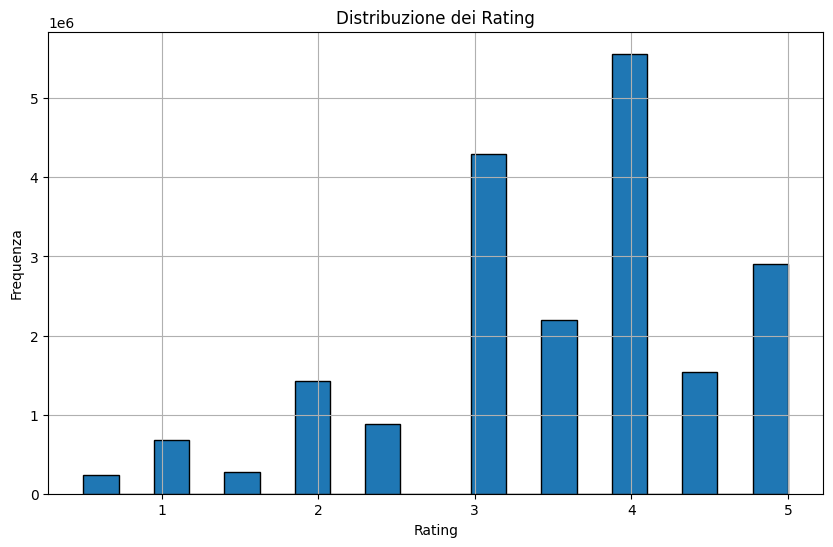

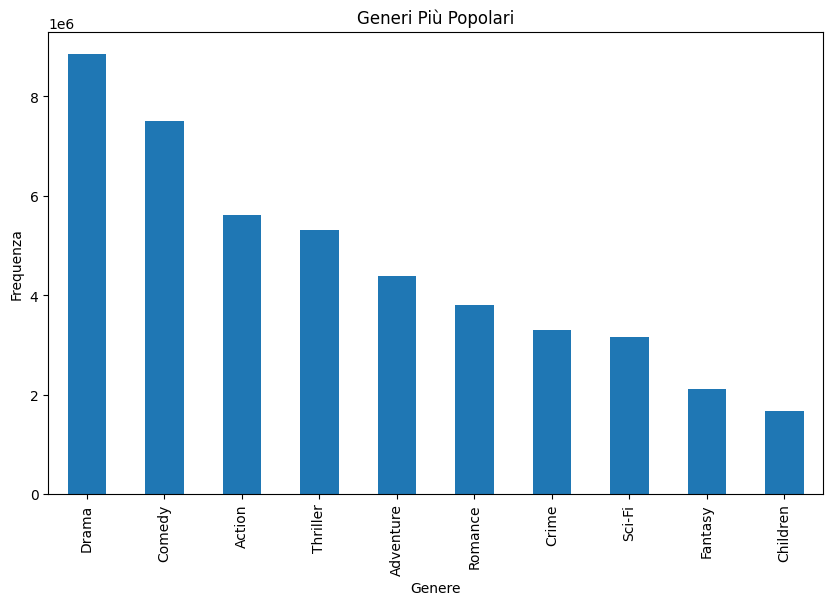

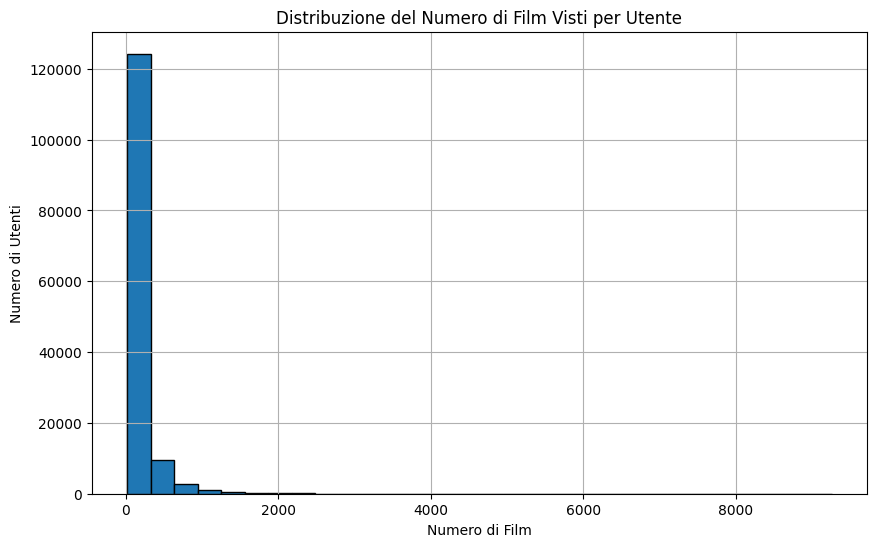

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ratings_with_movies['rating'].hist(bins=20, edgecolor='black')
plt.title("Distribuzione dei Rating")
plt.xlabel("Rating")
plt.ylabel("Frequenza")
plt.show()

plt.figure(figsize=(10, 6))
genres_exploded.value_counts().head(10).plot(kind='bar')
plt.title("Generi Più Popolari")
plt.xlabel("Genere")
plt.ylabel("Frequenza")
plt.show()

plt.figure(figsize=(10, 6))
movies_per_user.hist(bins=30, edgecolor='black')
plt.title("Distribuzione del Numero di Film Visti per Utente")
plt.xlabel("Numero di Film")
plt.ylabel("Numero di Utenti")
plt.show()


Rating medio per genere:
genres
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64


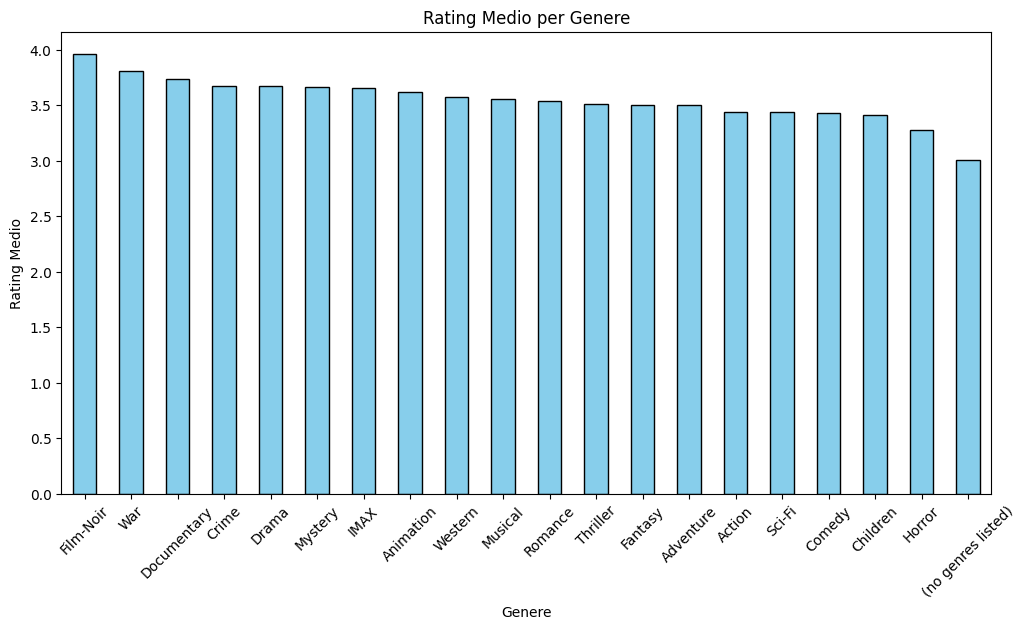

In [ ]:
genres_ratings = ratings_with_movies[['genres', 'rating']].copy()
genres_ratings['genres'] = genres_ratings['genres'].str.split('|')  
genres_exploded = genres_ratings.explode('genres')  
average_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

print("\nRating medio per genere:")
print(average_rating_per_genre)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Rating Medio per Genere")
plt.xlabel("Genere")
plt.ylabel("Rating Medio")
plt.xticks(rotation=45)
plt.show()


Utenti con il maggior numero di rating:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: rating, dtype: int64


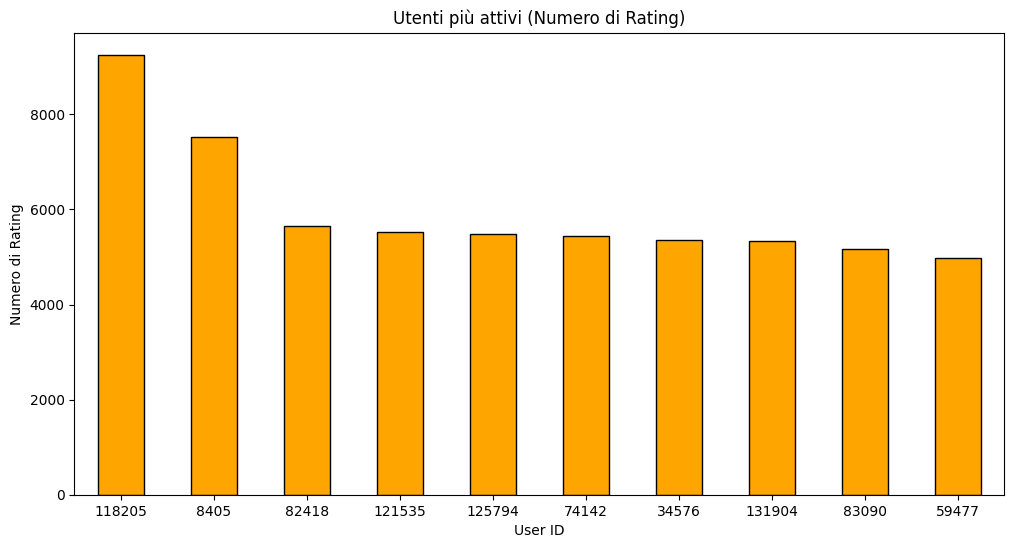

In [ ]:
ratings_per_user = ratings_with_movies.groupby('userId')['rating'].count().sort_values(ascending=False)
print("\nUtenti con il maggior numero di rating:")
print(ratings_per_user.head(10))

plt.figure(figsize=(12, 6))
ratings_per_user.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Utenti più attivi (Numero di Rating)")
plt.xlabel("User ID")
plt.ylabel("Numero di Rating")
plt.xticks(rotation=0)
plt.show()


Film con rating medi più alti:
                                               average_rating  rating_count
title                                                                      
Shawshank Redemption, The (1994)                     4.446990         63366
Godfather, The (1972)                                4.364732         41355
Usual Suspects, The (1995)                           4.334372         47006
Schindler's List (1993)                              4.310175         50054
Godfather: Part II, The (1974)                       4.275641         27398
Seven Samurai (Shichinin no samurai) (1954)          4.274180         11611
Rear Window (1954)                                   4.271334         17449
Band of Brothers (2001)                              4.263182          4305
Casablanca (1942)                                    4.258327         24349
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)        4.256935          6525

Film con rating medi più bassi:
                       

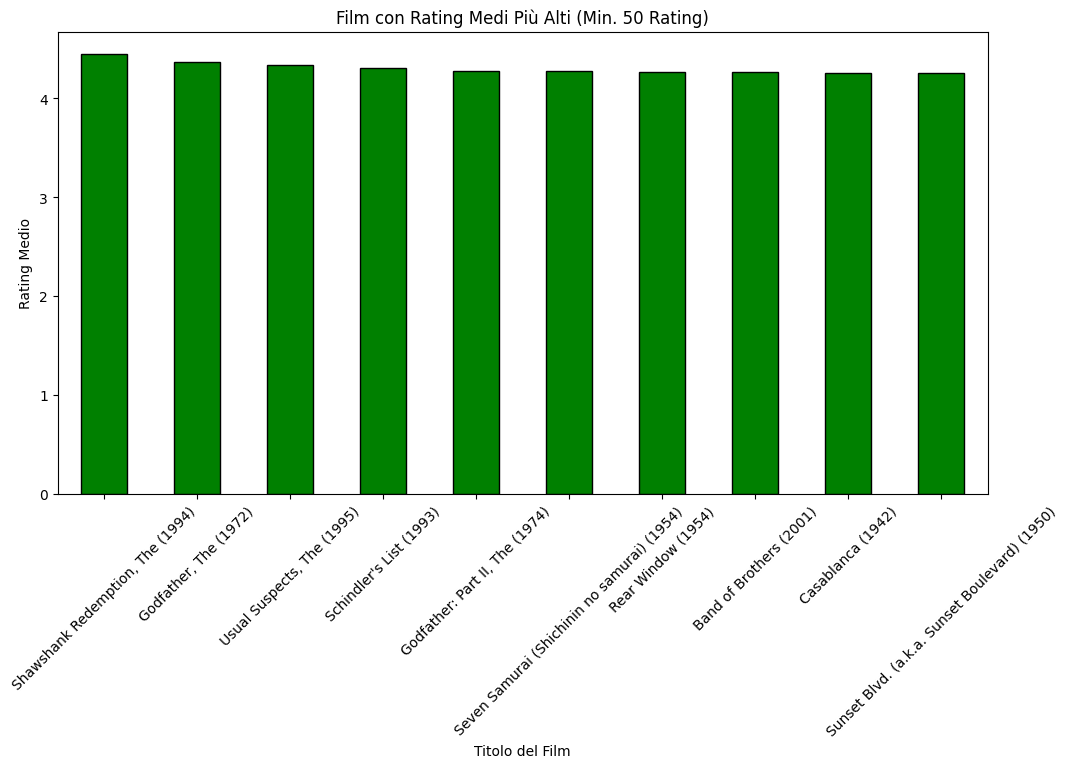

In [ ]:
movies_stats = ratings_with_movies.groupby('title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

popular_movies_stats = movies_stats[movies_stats['rating_count'] >= 50]

top_rated_movies = popular_movies_stats.sort_values(by='average_rating', ascending=False).head(10)
print("\nFilm con rating medi più alti:")
print(top_rated_movies)

lowest_rated_movies = popular_movies_stats.sort_values(by='average_rating').head(10)
print("\nFilm con rating medi più bassi:")
print(lowest_rated_movies)

plt.figure(figsize=(12, 6))
top_rated_movies['average_rating'].plot(kind='bar', color='green', edgecolor='black')
plt.title("Film con Rating Medi Più Alti (Min. 50 Rating)")
plt.xlabel("Titolo del Film")
plt.ylabel("Rating Medio")
plt.xticks(rotation=45)
plt.show()


Numero di rating per anno:
timestamp
1995          4
1996    1612609
1997     700982
1998     308070
1999    1198384
2000    1953659
2001    1186125
2002     869719
2003    1035878
2004    1170049
2005    1803158
2006    1171836
2007    1053430
2008    1158777
2009     930036
2010     903691
2011     766366
2012     731389
2013     599327
2014     562888
2015     283886
Name: count, dtype: int64


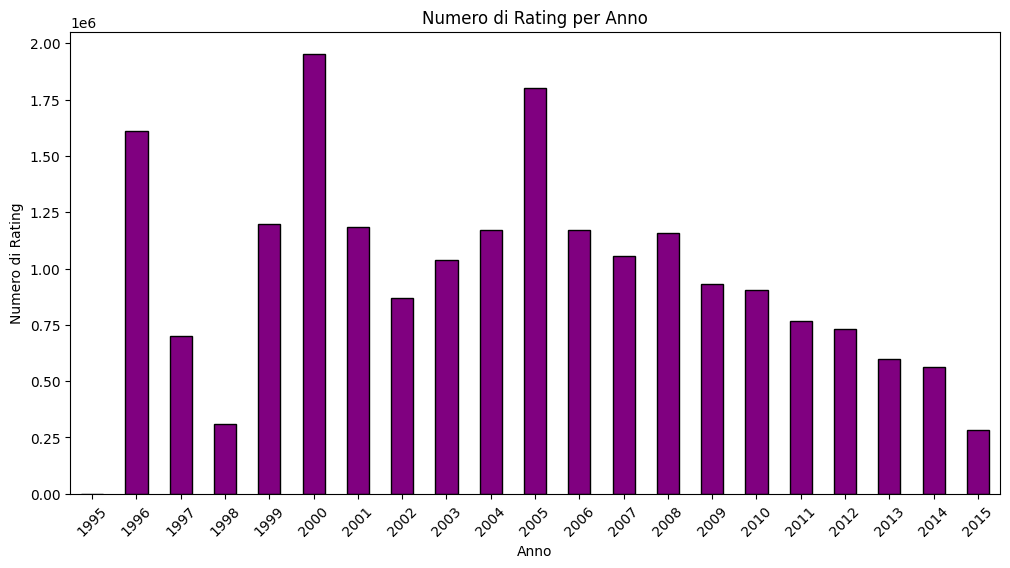


Rating medio per anno:
timestamp
1995    3.750000
1996    3.545408
1997    3.588522
1998    3.512484
1999    3.616337
2000    3.576119
2001    3.533771
2002    3.482654
2003    3.474775
2004    3.429614
2005    3.434001
2006    3.463172
2007    3.471741
2008    3.539019
2009    3.508644
2010    3.533408
2011    3.562192
2012    3.609827
2013    3.644767
2014    3.607711
2015    3.499819
Name: rating, dtype: float64


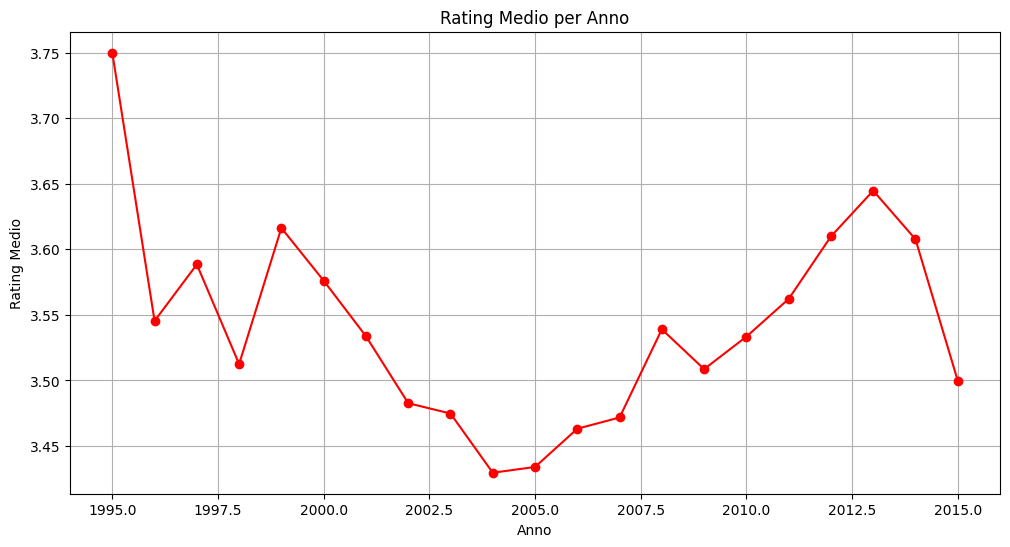

In [ ]:
ratings_with_movies['timestamp'] = pd.to_datetime(ratings_with_movies['timestamp'])

ratings_per_year = ratings_with_movies['timestamp'].dt.year.value_counts().sort_index()
print("\nNumero di rating per anno:")
print(ratings_per_year)

plt.figure(figsize=(12, 6))
ratings_per_year.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Numero di Rating per Anno")
plt.xlabel("Anno")
plt.ylabel("Numero di Rating")
plt.xticks(rotation=45)
plt.show()

average_rating_per_year = ratings_with_movies.groupby(ratings_with_movies['timestamp'].dt.year)['rating'].mean()
print("\nRating medio per anno:")
print(average_rating_per_year)

plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o', color='red')
plt.title("Rating Medio per Anno")
plt.xlabel("Anno")
plt.ylabel("Rating Medio")
plt.grid()
plt.show()

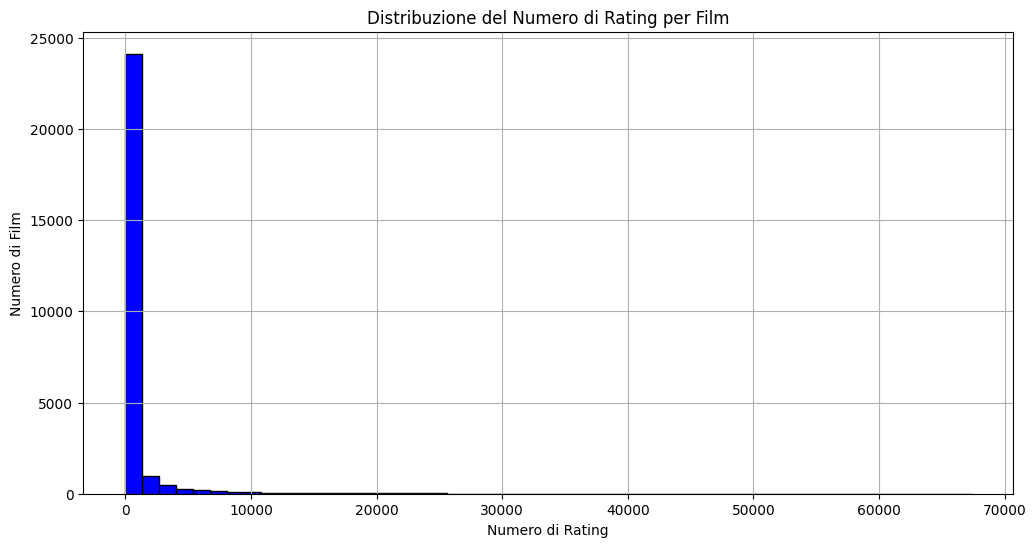

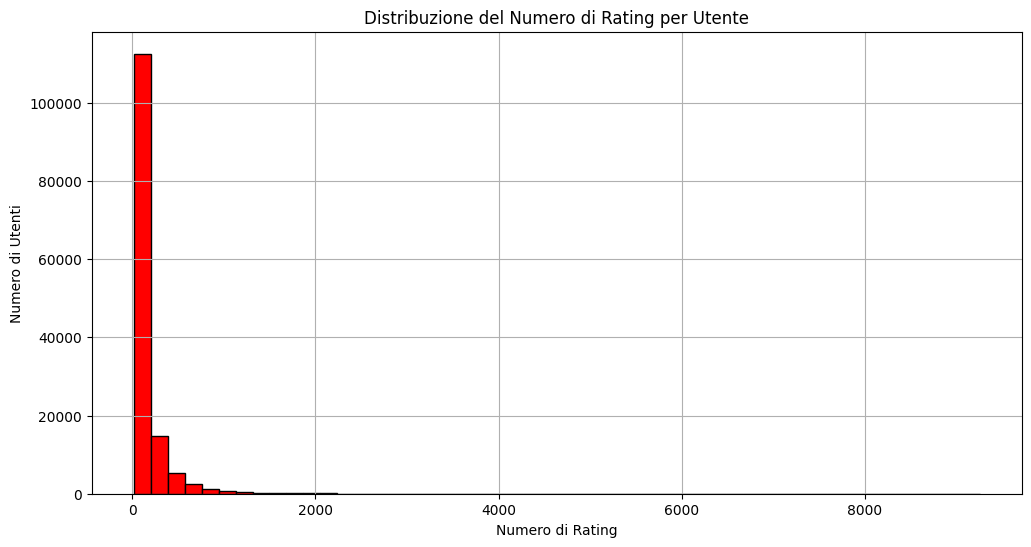

In [ ]:
plt.figure(figsize=(12, 6))
ratings_per_movie.hist(bins=50, color='blue', edgecolor='black')
plt.title("Distribuzione del Numero di Rating per Film")
plt.xlabel("Numero di Rating")
plt.ylabel("Numero di Film")
plt.show()

plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50, color='red', edgecolor='black')
plt.title("Distribuzione del Numero di Rating per Utente")
plt.xlabel("Numero di Rating")
plt.ylabel("Numero di Utenti")
plt.show()